## **K-Means Clustering**

1. `K` represents a number and `Means` repreent average.
2. This is a kind of unsupervised machine learning. We have only features (X) here.
3. Classify data points into groups based on their similarities.
4. `K` shows the number of clusters to be created.
   1. `But how many clusters (K) should we have?`
5. `Means` is a data point of cluster average.
   1. `Centroid` is just like gravity which divides the cluster.
   2. Centroid, Inertia and Distance plays a key role.

`Inertia` measures how well a dataset was clustered by K-Means. It is calculated by measuring the `distance` between each data point and its `centroid`, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

`Inertia` is the sum of the squared distances between each data point and its closest cluster center.

#### **Centroid:**

1. Depends on user input (K). How much centroid will be made?
2. Data points are together to make teams.
3. Which form a cluster.


`The most important thing is to choose correct K value and iterations`

#### **K-Means works in 4 Steps**

1. Initilization
    - randomly initializa K number centriods.
2. Assignment
    - the data points near to centroids count in that cluster.
3. Update
    - the position of each centroid is recalculated (means).
4. Iteration
    - Step 2 and 3 is repeated again and again. Until the centroid is not moved significantly.

### Two Methods To Choose K

1. Elbow Method
2. Silhouette Method

### Selecting Iteration

1. Run algorithm based on centroid value.
2. We make graph against number of iteration.

### **Evaluation of K-Means Clustering**

1. `WCSS (Within Cluster Sum of Squares)` is inertia -> Inertia (distance of data points to the closest point of centroid).
    - If inertia is low (tight) then it means that cluster is best.
2. `Silhouette Score` -> is a measure of how similar an object is to its own cluster's data point.
    - If Silhouette score is +1 then it well match to its cluster.
    - If its near to 0 then it thinks that I don't have cluster. With Every cluster it matches.
    - If its -1 then it doesn't match to this cluster and matches to other cluster.

#### **Limitations of K-Means Cluster**

1. Fast, Efficient and Simple (Benefits).
2. Hard to find number of clusters.
3. Sensitive to initial centroid.
4. Multiple Runs.
5. Sperical Assumptions.
6. No outliers in data.
7. Require scaled data.
8. Not good for binary data.
9. Computationally Expensive.

`Global Optimia` In optimization problems, a global optima (plural: global optima) refers to the best possible solution across the entire solution space. It can be either a global minimum or a global maximum depending on whether the objective is to minimize or maximize a function.

## **K-Means ++**

K-means++ is a smart centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another.

### Example 1

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

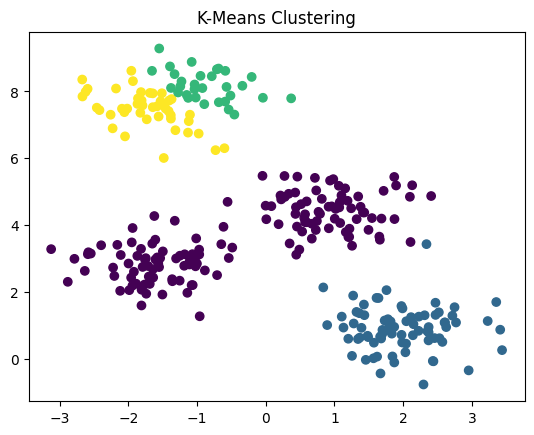

In [2]:
# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate a K-Means object with the number of clusters
kmeans = KMeans(n_clusters=4)
# fit the data to KMeans algorithms
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

### Let's practice on diamond dataset

In [3]:
df = sns.load_dataset('diamonds')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


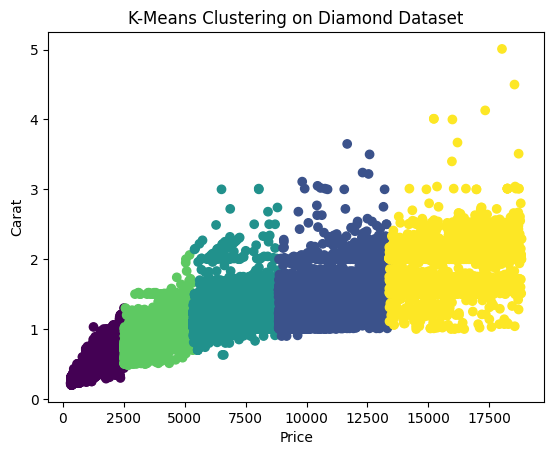

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

X = df[['price','carat']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# add the predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# plot the data points different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title("K-Means Clustering on Diamond Dataset")
plt.show()

<Axes: xlabel='labels', ylabel='price'>

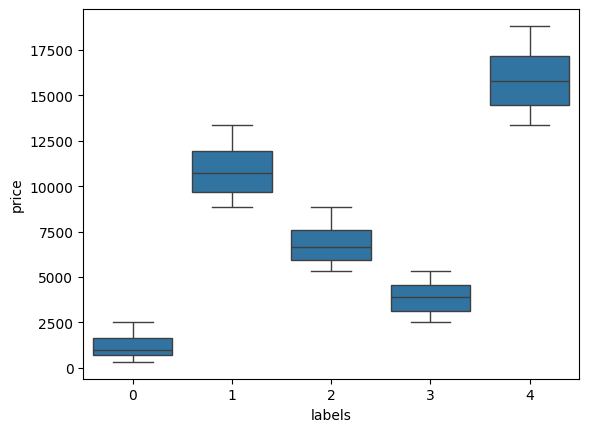

In [7]:
sns.boxplot(x='labels', y='price', data=df)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [9]:
df.labels.unique()

array([0, 3, 2, 1, 4], dtype=int32)

### lets change the number of clusters

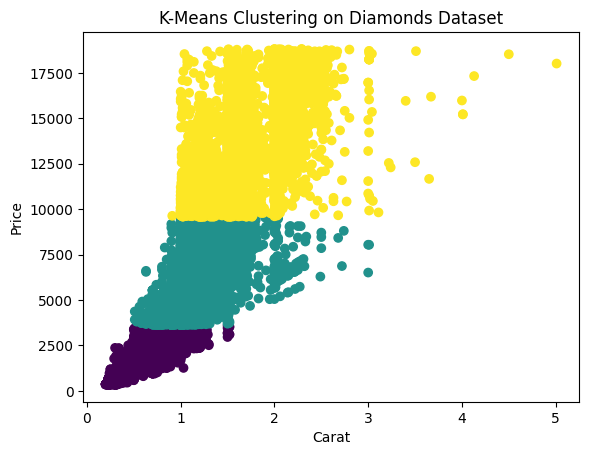

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

diamonds = sns.load_dataset('diamonds')
# Select relevant columns
X = diamonds[["carat", "price", "cut", "color", "clarity"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

## Can we plot categorical data? with numerical?

You can also use a scatterplot and a lineplot to visualise categorical with numerical data. Other plots to represent categorical and numerical data are boxplot and barplot. A boxplot shows the locality, spread and skewness groups of numerical data.

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'labels'],
      dtype='object')

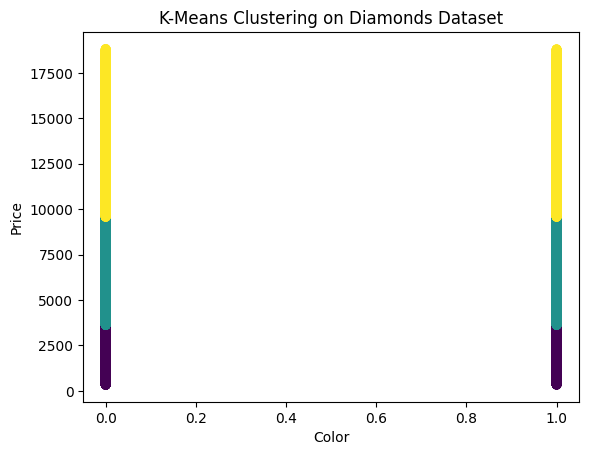

In [14]:
# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 2], X.iloc[:, 1], c=labels)
plt.xlabel("Color")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

### Which kind of input variables can we take in k means clustering?

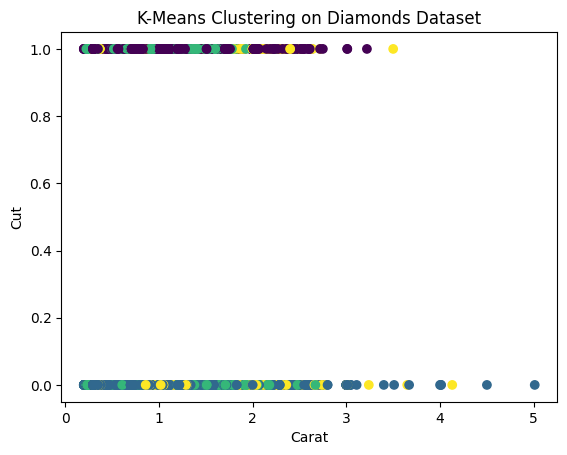

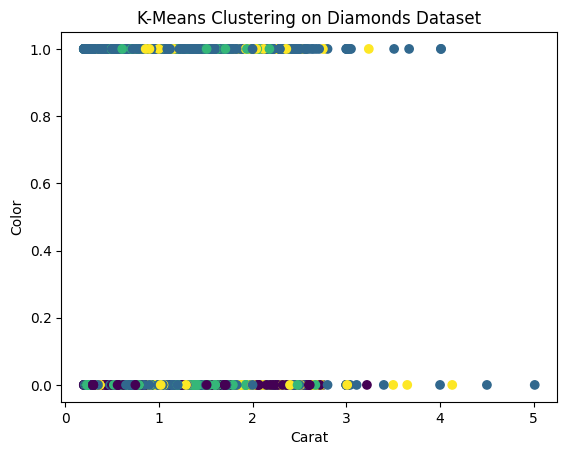

In [15]:
 # Select relevant columns
X = diamonds[["carat", "cut", "color"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Cut")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Color")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

### Adding cluster labels to the data for further EDA work


In [16]:
# Select relevant columns
X = diamonds[["carat", "price"]]

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Display the first few rows of the dataset with the new column added
print(diamonds.head())

#display the unique values of a label
print("These are the unique values of labels: ", sorted(diamonds.labels.unique()))

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       0
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       0
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       0
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       0
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       0
These are the unique values of labels:  [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)]


### Make a parallel coordinate plot using plotly express


In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(diamonds, color="labels")
fig.show() 

## Model Evaluation

### 1. Elbow Method

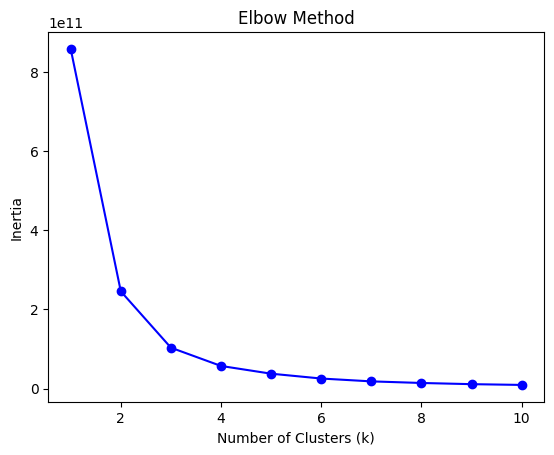

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


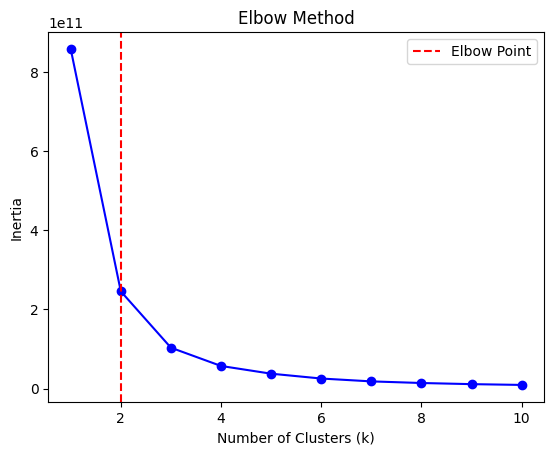

The best number of clusters based on the Elbow Method is: 2


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)

### 2. Silouette Method


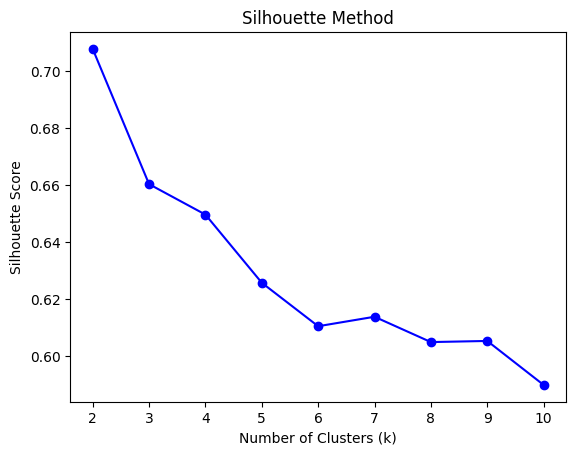

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
# Find the best number of clusters based on the Silhouette Method
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Add a vertical line to indicate the best number of clusters
plt.axvline(x=best_k, color='r', linestyle='--', label='Best Number of Clusters')

plt.legend()
plt.show()

print("The best number of clusters based on the Silhouette Method is:", best_k)

### Other evaluation methdos
1. Calinski-Harabasz
2. Davies-Bouldin
3. Silhouette
4. Gap statistic
5. Bayesian information criterion (BIC)

## KMeans++

### Centroid Initialization:

- K-means: In the original K-means algorithm, centroids are initialized randomly from the available data points.
- K-means++: The K-means++ algorithm initializes the first centroid randomly, but subsequent centroids are chosen based on the distances to previously selected centroids. Data points farther away from existing centroids have a higher probability of being chosen.

### Impact on Clustering Results:

- K-means: The random initialization in K-means can lead to different clusterings each time the algorithm is run. It is more sensitive to the initial placement of centroids, and there is a higher chance of converging to suboptimal solutions.
- K-means++: By strategically initializing centroids, K-means++ mitigates the sensitivity to initialization. It encourages a more spread-out initialization, which typically leads to better cluster formation and more reliable results. K-means++ tends to produce more stable and consistent clusters across different runs.

### Convergence and Efficiency:

- K-means: The random initialization in K-means may require more iterations to converge, as the initial centroids might be far from their optimal positions. It can result in slower convergence and higher computational costs.
- K-means++: The improved initialization in K-means++ often leads to faster convergence since the initial centroids are better positioned. It reduces the number of iterations required to achieve convergence and can improve the algorithm's efficiency.
- Overall, K-means++ is a modification of the standard K-means algorithm that provides a more effective and robust initialization scheme. By selecting initial centroids strategically, it enhances the quality of the clustering results and reduces sensitivity to the initial random initialization. K-means++ is widely used in practice as it improves the performance and stability of the K-means clustering algorithm.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering with K-means++
k = 3  # Number of clusters
kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_pp.fit(X)

# Perform standard K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df['cluster_pp'] = kmeans_pp.labels_
df['cluster'] = kmeans.labels_

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster_pp,cluster
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,1


In [25]:
df.cluster.value_counts()

cluster
1    32851
2    15374
0     5715
Name: count, dtype: int64

In [26]:
df.cluster_pp.value_counts()

cluster_pp
1    32851
2    15374
0     5715
Name: count, dtype: int64